# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Download the following datasets and place in folder 'data':
[Scenario 9](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow)
[Scenario 10](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow)
[Scenario 11](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow)
[Scenario 12](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow)

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Infected hosts
 Duration: 90.82559153096324
 Average Packets 30.315330224161276
 Average Bytes 27129.65718557244
 Source Bytes 27121.20417105461
 Protocols: 
 ICMP    0.996474
UDP     0.002755
TCP     0.000771
Name: Protocol, dtype: float64


Non-Infected hosts
 Duration: 46.58566988862245
 Average Packets 35.74916387959866
 Average Bytes 27199.363854357292
 Source Bytes 1660.3409478134663
 Protocols: 
 UDP     0.617152
TCP     0.337162
ICMP    0.044993
ARP     0.000694
Name: Protocol, dtype: float64

Figure 1: Difference in distribution for infected and non-infected hosts


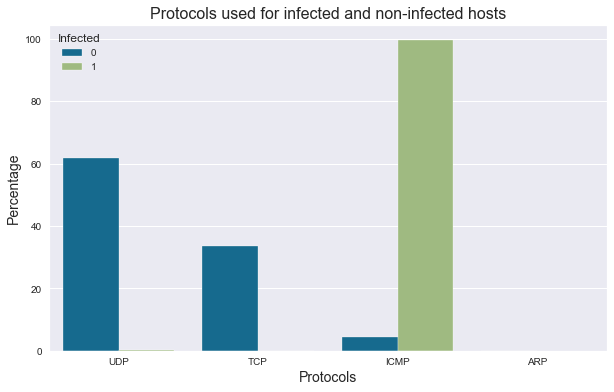

In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import familiarization as fam

import warnings
warnings.filterwarnings('ignore')

# Read, process and divide data
data = fam.load_data("data/capture20110818.binetflow")
pdata = fam.pre_process(data)
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Compare statistics for infected and non-infected hosts
## Average Duration
duration_infected = np.mean(infected_hosts["Duration"])
duration_non_infected = np.mean(non_infected_hosts["Duration"])

## Protocol
protocols_infected = infected_hosts.Protocol.value_counts(normalize=True)
protocols_non_infected = non_infected_hosts.Protocol.value_counts(normalize=True)

## Average TotalPackets
packets_infected = np.mean(infected_hosts.TotalPackets)
packets_non_infected = np.mean(non_infected_hosts.TotalPackets)

## Average TotalBytes
bytes_infected = np.mean(infected_hosts.TotalBytes)
bytes_non_infected = np.mean(non_infected_hosts.TotalBytes)

## Average SourceBytes
source_bytes_infected = np.mean(infected_hosts.SourceBytes)
source_bytes_non_infected = np.mean(non_infected_hosts.SourceBytes)

print("Infected hosts")
print(" Duration:", duration_infected)
print(" Average Packets",packets_infected)
print(" Average Bytes",bytes_infected)
print(" Source Bytes",source_bytes_infected)
print(" Protocols: \n",protocols_infected)

print("\n")
print("Non-Infected hosts")
print(" Duration:", duration_non_infected)
print(" Average Packets",packets_non_infected)
print(" Average Bytes",bytes_non_infected)
print(" Source Bytes",source_bytes_non_infected)
print(" Protocols: \n",protocols_non_infected)

# Visualize protocols used to show difference between infected and non-infected hosts
protocol_grouped = pdata.groupby('Infected')['Protocol'].value_counts(normalize=True)
protocol_grouped = protocol_grouped.mul(100)
protocol_grouped = protocol_grouped.rename('percent').reset_index()

print()
print("Figure 1: Difference in distribution for infected and non-infected hosts")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Protocol',y='percent',hue='Infected',data=protocol_grouped)
ax.set_title("Protocols used for infected and non-infected hosts",size=16)
ax.set_ylabel("Percentage",size=14)
ax.set_xlabel("Protocols",size=14)
plt.show()

### 1b. Discretize selected features

Figure 2: Optimal number of bins for feature Protocol of infected host 147.32.84.205


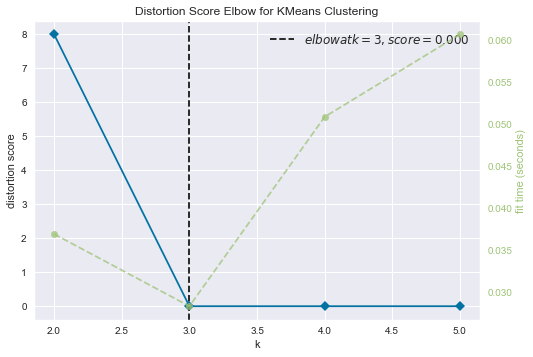

Figure 3: Optimal number of bins for feature Duration of infected host 147.32.84.205


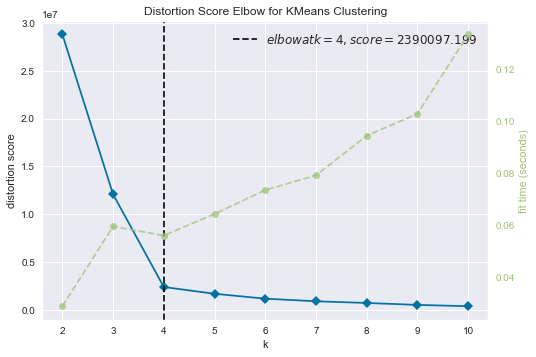

Figure 4: Discretized Protocol and Duration features for an infected and non-infected host


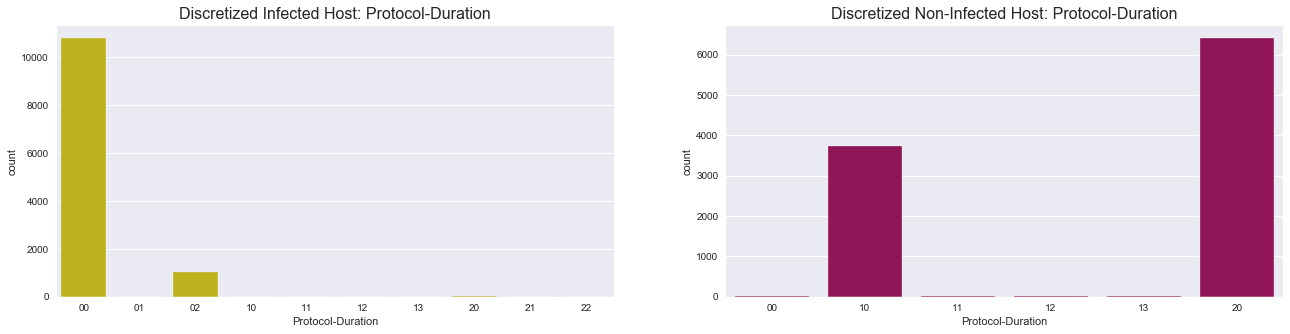

Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts


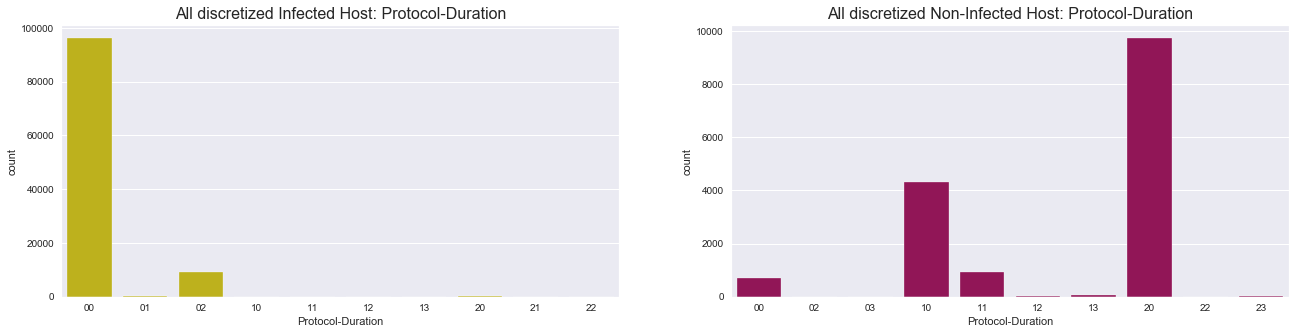

In [3]:
# Encode protocol names
pdata["Protocol"] = fam.encode_feature(pdata["Protocol"])

# Select all infected and non-infected hosts
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Select infected host with most entries in dataset
infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_infected_host(pdata)]
non_infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_non_infected_host(pdata)]

# Apply Elbow method to find optimal number of bins
features = ["Protocol","Duration"]
for feature in features:
    print("Figure "+str(features.index(feature)+2)+": Optimal number of bins for feature "+feature+" of infected host "+fam.select_infected_host(pdata))
    fam.elbow(infected_host,feature)

# Optimal number of bins for Protocol and Duration feature
nbins = [3,4]

# Descretization of one infected/non-infected host
discretized_infected = pd.DataFrame()
discretized_non_infected = pd.DataFrame()

for feature, nbin in zip(features,nbins):
    discretized_infected[feature], binsedges_infected = fam.discretize_feature(infected_host, feature, nbin, "kmeans")
    discretized_non_infected[feature], binsedges_non_infected = fam.discretize_feature(non_infected_host, feature, nbin, "kmeans")

discretized_infected["Protocol-Duration"] = discretized_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected["Protocol-Duration"] = discretized_non_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 4: Discretized Protocol and Duration features for an infected and non-infected host")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected, color="m", ax=ax2)
ax1.set_title("Discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("Discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

# Discretization of all hosts
discretized_infected_all = pd.DataFrame()
discretized_non_infected_all = pd.DataFrame()

for feature, nbin in zip(features,nbins):
    discretized_infected_all[feature], binsedges_infected = fam.discretize_feature(infected_hosts, feature, nbin, "kmeans")
    discretized_non_infected_all[feature], binsedges_non_infected = fam.discretize_feature(non_infected_hosts, feature, nbin, "kmeans")

discretized_infected_all["Protocol-Duration"] = discretized_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected_all["Protocol-Duration"] = discretized_non_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected_all, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected_all, color="m", ax=ax2)
ax1.set_title("All discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("All discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

### 1b. Answers and explanation

Stream data is a continous flow of data that builds up rapidly. To be able to process and quickly judge the individual flows, discretization can be applied. Discretization breaks the very high number of degrees of freedom for each feature into small groups/categories/bins such that is easier to understand and process the data. Another advantage of discretization is that not every model is able to work with continuous data. For each feature the values are split into a number of bins (N). Bins can be filled according to multiple methods: uniform, quantile and kmeans. Some data is more suitable for one method than the other, e.g. kmeans is good applicable if the data consists of several clusters and uniform (equal-width bins) if the data is equally distributed.

After processing the data the first thing to find out is which features are most suitable for discretization. Looking at the numbers we quickly see that the duration, sourcebytes, and protocols (see Figure 1) are quite different between the infected and non-infected flows. After further investigation we find that the protocol and duration feature looks most promising. For the infected hosts almost all flow uses the ICMP protocol, while the non-infected hosts mostly use UDP and TCP. The duration of a flow for infected hosts is almost twice as long as for non-infected hosts. There is not really a suitable plot method to visualize the difference for the duration feature.

To find out the optimal number of bins to use for descretization we can apply the Elbow method [1]. We select an infected and non-infected host to discretize the features. Before we can apply this method, the protocol feature must be encoded in numerical values. After applying the Elbow method we obtain that the protocol feature is optimal with 3 bins and the duration feature with 4 bins (see Figure 2,3). We can now descritize both features with the obtained bin sizes. Afterwards, we can concatenate both discrete values for both features to obtain a single discrete value (see Figure 4). We see that for the infected host almost all values are '00' and for the non-infected host '10' and '20' are most popular. In Figure 5 we have applied the same discretization on all hosts in the dataset. The results are almost the same, although the non-infected flows also include some other discrete values.

We can thus clearly see the effect on discretization, which can easily and quite fast be implemented to be used for infection detection. For every incoming flow both features can be discretized and concatenated to be able to make a judgement on the infection status. However, this does not directly mean that if the discretized features results in a value of '00' the host is infected. Discretization should be combined with more features or more separate discretized features to be able to make a judgement with a higher success rate.

[1] Learning Behavioral Fingerprints From Netflows Using Timed Automata. Gaetano Pellegrino, Qin Lin, Christian Hammerschmidt and Sicco Verwer

## 2. Frequent task – 1/2 A4 (Individual) - Lennart

### 2a. Use the SPACE SAVING algorithm

### 2b. Analysis and answers to the questions

## 3. Sketching task – 1/2 A4 (Individual) - Joost

### 3a. COUNT-MIN sketch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Figure 6: the number of false positives for different widths and depths


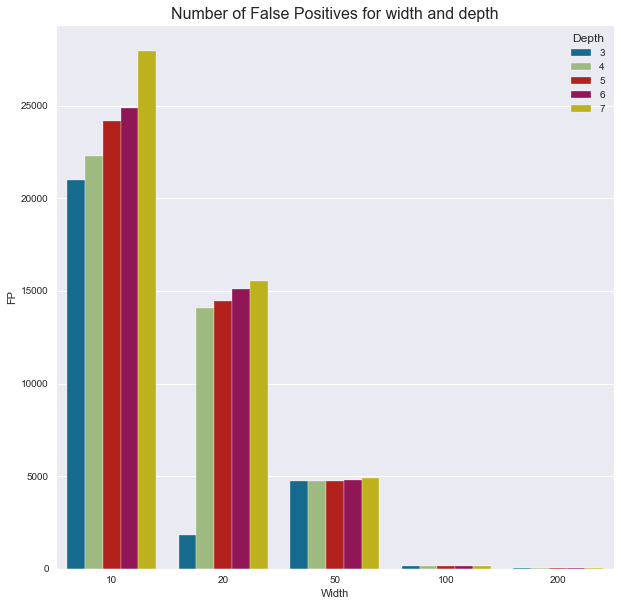

,Trigram,CM,Count,Extra_Frequency
Top,,,,
0,000,105686,105557,100.122
1,222,3442,3442,100
2,221,2943,2943,100
3,122,3142,2824,111.261
4,212,2468,2468,100
5,111,1637,1637,100
6,211,632,542,116.605
7,112,531,531,100
8,002,416,416,100


In [4]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sketching as sketch
import math

data = sketch.load_data("data/capture20110818.binetflow")
pdata = sketch.pre_process(data)

# We first discretize the values for the features we selected in the discretization task. 
# We then make trigrams 
# Optimal number of bins for source address, based on elbow method
nbin_source_address = 3

# Discretize the protocol values (after encoding them first)
discretized = pd.DataFrame()
discretized["SourceAddress"] = pdata['SourceAddress'].copy()
discretized["Protocol"] = sketch.encode_feature(pdata["Protocol"])
discretized["Protocol"], binsedges_infected = sketch.discretize_feature(discretized, "Protocol", nbin_source_address, "kmeans")

# Create 3-grams based on the descretized protocol and of its two predecessors
discretized["trigram"] = 0
discretized.trigram.iloc[0] = str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])
discretized.trigram.iloc[1] = str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[1])

for i in range(2,len(discretized)):
    discretized.trigram.iloc[i] = str(discretized.Protocol.iloc[i-2])+""+str(discretized.Protocol.iloc[i-1])+""+str(discretized.Protocol.iloc[i])

# Define possible values for error probability (δ) and error factor (ε).
# Higher width and depth implies a lower error.
deltas = [0.05, 0.025, 0.01, 0.0025, 0.001]
epsilons = [0.1, 0.05, 0.02, 0.01, 0.005]
combinations = [(i, j) for i in deltas for j in epsilons]

results = pd.DataFrame(columns=["Width","Depth","Delta","Epsilon","Trigram","CM","Count", "FP"])

# For each combination of delta and epsilon the sketch is computed
for delta, epsilon in combinations:
    # Calculate the width (possible values) and depth (hash functions)
    width = (int) (1/epsilon)
    depth = round((math.log(1/delta)))
    hash_values = [[0]*width]*depth

    # Compute the sketch by increasing the value for the corresponding hash function by one for each 3-gram
    for trigram in discretized.trigram:
        for i in range(depth):
            hash_values[i][sketch.hash_function(trigram,i,width)] += 1
    
    # For each unique trigram the number of COUNT-MIN value is computed and saved for evaluation
    for value in discretized.trigram.unique():
        hashes = [sketch.hash_function(value,x,width) for x in range(depth)]
        values = [0]*depth

        for h in range(depth):
            values[h] = hash_values[h][hashes[h]]
            
        fp = np.min(values)-len(discretized.loc[discretized["trigram"] == value])
        results = results.append({"Width": width, "Depth": depth, "Delta": delta,"Epsilon": epsilon,"Trigram": value,"CM": np.min(values),"Count": len(discretized.loc[discretized["trigram"] == value]), "FP": fp}, ignore_index=True)
        
# Group the results for the FP count
grouped_results = results.groupby(['Width','Depth']).agg({'FP':'sum'}).reset_index()

# Plot the results for each combination of width and depth
print("Figure 6: the number of false positives for different widths and depths")
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x="Width",y="FP",hue="Depth",data=results, ci=None, ax=ax)
ax.set_title("Number of False Positives for width and depth", size=16)
plt.show()

# Choose a suitable width and depth based on the results and obtain the frequencies for the top10 3-grams
filter_results = results.loc[(results["Width"] == 100) & (results["Depth"] == 4)].sort_values(by=['Count'], ascending=False)
filter_results["FP"] = filter_results["CM"]-filter_results["Count"]
filter_results["Extra_Frequency"] = filter_results["CM"]/filter_results["Count"]*100
top_trigrams = filter_results[["Trigram","CM","Count","Extra_Frequency"]].reset_index()
top_trigrams.index.name = "Top"
top_trigrams[["Trigram","CM","Count","Extra_Frequency"]].head(10)

### 3b. Analysis and answers to the questions

COUNT-MIN sketches are very good applicable to continuous streams of data. They reflect an approximation of the real data in the streams in sub-linear space, in which the approximation differs because of the chosen variables of width and depth. As with discretization, it uses only a fraction of the distinct values. The width and depth (number of distinct hash functions) variables depend on the error probability (δ) and error factor (ε). The width is equal to the inverse of the error factor (1/ε) and the depth is equal the logarithm of the inverse of the error probability (log(1/δ)). The hash functions must be pair-wise independent to prevent hash collisions in the profiles. This independence is preserved using gi(x) = h1(x) + i*h2(x), described in [2]. The 3-gram profiles are built by concatenating the discretized values of the protocol feature of a row and its two predecessors. 

We expect that the higher the width and depth, the less false positives should appear because the probability of a collision is lower. Simply choosing a very high width and depth contradicts the use of sketching since this method aims to lower the width and depth. We therefore must find a good trade-off in false positives and width and depth.

What we observe from the results is that for a width of 10 the number of false positives is enormous (see Figure 6). Increasing the width from 20 to 50 increases the accuracy significantly. For a width of at least 200 the number of false positives is almost zero, although this also increases the used memory significantly. We would like to choose a width and depth that is memory efficient with a low number of false positives. The biggest relative accuracy increase (and not too many number of FP) is obtained with a width of 100 and a depth of 4, 'only' storing 400 values. Using the chosen width and depth, we obtain the top 10 with their frequencies. We see that "000" is clearly the most frequent 3-gram, with a fraction of collisions in about 100K occurences. 

As said earlier, the COUNT-MIN sketch approximation is probablistic, which increases the accuracy by the use of a higher width and depth. The lower the width and depth, the more approximation errors arise. These approximation errors originate from collisions in the (3-gram) profiles. The more hash functions are used, the lower the probability that there exists hash collisions (overlap) with the same profile. However, this does not mean that the width and depth are independent from each other. If a lot of hash functions are used in combination with a low width, the probability of the same profiles as a result increase. 

[2] Less Hashing, Same Performance: Building a Better Bloom Filter. Adam Kirsch, Michael Mitzenmacher.

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual) - Lennart

### 4a. Implementation

### 4b. Analysis and answers to the questions

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual) - Joost

### 5a. Implementation - locality sensitive hashing

In [16]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import lsh_hyperplane as lsh
import math
import random
from nltk.util import ngrams
import time

pd.options.mode.chained_assignment = None

data = lsh.load_data("data/capture20110818.binetflow")
pdata = lsh.pre_process(data)

# We first discretize the values for the features we selected in the discretization task. 
# We then make trigrams 
# Optimal number of bins for source address, based on elbow method
features = ["Protocol"]
nbins = [3]

# Descretize only one infected host (with most flows)
discretized = pd.DataFrame()
discretized["StartTime"] = pdata["StartTime"].copy()
discretized['StartTime'] = discretized['StartTime'].str[:-7]
discretized["SourceAddress"] = pdata["SourceAddress"].copy()
discretized["DestinationAddress"] = pdata["DestinationAddress"].copy()
pdata["Protocol"] = lsh.encode_feature(pdata["Protocol"])

for feature, nbin in zip(features,nbins):
    discretized[feature], binsedges_infected = lsh.discretize_feature(pdata, feature, nbin, "kmeans")
    
# Remove pairs with less than three occurrences (unable to form 3-gram)
ip_pairs = discretized.groupby(['SourceAddress','DestinationAddress']).size().reset_index().rename(columns={0:'count'})

# Obtain the list of unique ip pairs.
# Define the number of projections to apply and the number of bits as the bucket number (2^k bins for k bits)
ip_pairs = discretized.groupby(["SourceAddress","DestinationAddress"]).size().reset_index()
n_projections = 3
bin_size = 2

# Create a dataframe where all computations will be added
column_names = list()
column_names.append("SourceAddress")
column_names.append("DestinationAddress")
column_names.append("trigrams_counts")

for i in range(n_projections):
    column_names.append("hash_code_"+str(i))
    column_names.append("bin_"+str(i))
    
column_names.append("bins_combined")
ip_pairs_trigrams = pd.DataFrame(columns=column_names)

# Create a set of 3-grams which exist in the dataset. 
possible_trigrams = list(set(ngrams(discretized["Protocol"].astype(str),3)))
dimension = len(possible_trigrams)

# For each pair we count the 3-gram occurences and save it to the dataframe
for pair in ip_pairs.iterrows():
    source = pair[1].SourceAddress
    dest = pair[1].DestinationAddress
    counts = [0]*len(possible_trigrams)
    
    filtered = discretized.loc[(discretized["SourceAddress"] == source) & (discretized["DestinationAddress"] == dest)]
    trigrams = list(ngrams(filtered["Protocol"].astype(str),3))
    
    for trigram in trigrams:
        counts[possible_trigrams.index(trigram)] += 1
    
    ip_pairs_trigrams = ip_pairs_trigrams.append({"SourceAddress": source, "DestinationAddress": dest, "trigrams_counts": counts}, ignore_index=True)
    
# Create random hyperplanes based on the bin size and 3-gram counts vector, and repeat for the number of projections
random_hyperplanes = list()

for i in range(n_projections):
    hyperplanes = np.random.randn(bin_size,dimension)
    random_hyperplanes.append(hyperplanes)

# For every unique pair we calculate the bin the 3-gram counts vector hashes to.
for pair_id in range(len(ip_pairs_trigrams)):
    pair = ip_pairs_trigrams.iloc[pair_id]
    
    hashed_bins = list()
    
    # Repeat this for every projection
    for i in range(n_projections):
        hash_bin = ""
            
        #For every random hyperplane we calculate the hash and add it to the list of all hash codes
        for hyperplane in random_hyperplanes[i]:
            hash_bin += str(lsh.sign_function(lsh.dot_product(pair.trigrams_counts,hyperplane)))
            
        # Save the hash code and the bin number to the dataframe
        ip_pairs_trigrams["hash_code_"+str(i)].iloc[pair_id] = hash_bin
        ip_pairs_trigrams["bin_"+str(i)].iloc[pair_id] = int(hash_bin,2)
        hashed_bins.append(int(hash_bin,2))
        
    ip_pairs_trigrams["bins_combined"].iloc[pair_id] = hashed_bins

# For obtaining the correct frequencies ip-pairs we neglect the ip pairs that have no trigrams, e.g. have less 
# than three flows between them. These hosts (unnecessarily) influence the results quite a lot. From these 
# removed pairs a lot of them are infected hosts, which only have a connection with other hosts once or twice.
non_zero_indices = list()
for i in range(len(ip_pairs_trigrams)):
    row = ip_pairs_trigrams.iloc[i]
    
    if np.sum(row.trigrams_counts) > 0:
        non_zero_indices.append(i)
        
res_ip_pairs = ip_pairs_trigrams.iloc[non_zero_indices]

# Retrieve infected and non infected source hosts. Infected host is 1, normal host is 0, unknown host is -1
res_ip_pairs.loc[:,'Infected'] = -1

for i in range(len(res_ip_pairs)):
    ip = res_ip_pairs.SourceAddress.iloc[i]
    if lsh.is_infected(ip):
        res_ip_pairs.Infected.iloc[i] = 1
    elif lsh.is_normal(ip):
        res_ip_pairs.Infected.iloc[i] = 0

# Separate the label cases to derive statistics on bins most frequent used for each label
infected = res_ip_pairs.loc[res_ip_pairs["Infected"] == 1]
normal = res_ip_pairs.loc[res_ip_pairs["Infected"] == 0]
unknown = res_ip_pairs.loc[res_ip_pairs["Infected"] == -1]

print("Infected host bins:")
print(infected.bins_combined.value_counts()/len(infected)*100, "\n")
print("Normal host bins:")
print(normal.bins_combined.value_counts()/len(normal)*100, "\n")
print("Unknown host bins:")
print(unknown.bins_combined.value_counts()/len(unknown)*100, "\n")

# Perform pair-wise distance computation between any pair
start = time.time()
distances_all = [[0 for i in range(len(res_ip_pairs))] for j in range(len(res_ip_pairs))]

for i in range(0,len(res_ip_pairs)):
    for j in range(i+1,len(res_ip_pairs)):
        distance = lsh.euclidean_distance(res_ip_pairs.trigrams_counts.iloc[i],res_ip_pairs.trigrams_counts.iloc[j])
        distances_all[i][j] = distance
        distances_all[j][i] = distance

end = time.time()
print("Time elapsed pair-wise computations:",end-start)

# Perform distance computation between pairs that are mapped to the same bin (only applied to one projection)
start = time.time()
distances_bins = list()

for bin_number in range(0,bin_size**2):
    filtered = res_ip_pairs.loc[res_ip_pairs["bin_0"] == bin_number]
    distances = [[0 for i in range(len(filtered))] for j in range(len(filtered))]
    
    for i in range(0,len(filtered)):
        for j in range(i+1,len(filtered)):
            distance = lsh.euclidean_distance(filtered.trigrams_counts.iloc[i],filtered.trigrams_counts.iloc[j])
            distances[i][j] = distance
            distances[j][i] = distance

    distances_bins.append(distances)

end = time.time()

print("Time elapsed for profiles in same bin:",end-start)

print("\nTable 5a: result of applying LSH with random hyperplanes")
ip_pairs_trigrams.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Infected host bins:
[1, 2, 2]    64.516129
[1, 1, 2]    32.258065
[2, 1, 2]     3.225806
Name: bins_combined, dtype: float64 

Normal host bins:
[2, 1, 2]    81.992337
[1, 2, 2]    16.091954
[1, 1, 2]     1.532567
[1, 1, 3]     0.383142
Name: bins_combined, dtype: float64 

Unknown host bins:
[1, 2, 2]    90.909091
[2, 1, 2]     9.090909
Name: bins_combined, dtype: float64 

Time elapsed pair-wise computations: 1.8759288787841797
Time elapsed for profiles in same bin: 1.0869488716125488

Table 5a: result of applying LSH with random hyperplanes


,SourceAddress,DestinationAddress,trigrams_counts,hash_code_0,bin_0,hash_code_1,bin_1,hash_code_2,bin_2,bins_combined
0,147.32.1.20,147.32.85.20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
1,147.32.1.20,147.32.85.7,"[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...",01,1,10,2,10,2,"[1, 2, 2]"
2,147.32.1.20,147.32.85.8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
3,147.32.1.20,147.32.86.135,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
4,147.32.1.20,147.32.86.155,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"


### 5b. Analysis and answers to the questions. Also provide relevant plots.

We first load and process the dataset of scenario 10. As in the tasks before we use the discretized Protocol feature from the first task. We group the unique ip-pairs of the dataset, to be able to count the 3-gram occurences of this discretized feature to create a profile. We set the bin size to 4 (2 bits) since choosing more (next number of bins is 2^3=8) result in unused bins. We also choose to project (apply a set of random hyperplanes) the 3-gram occurence counts three times to get a more reliable result than only using one projection. For one projection the probability of a pair being hashed to a wrong bin is higher, and the combined result of multiple projections decreases this probability significantly. 

In the Table 5a we see the combined bins of the three projections in the last column. We use this result to check the frequencies for the infected, normal and unknown hosts. We see that for the infected hosts about 64% results in a combined_bins that only occurs in about 16% of the cases for the normal hosts. We also see the opposite in which the 82% of the combined_bins for the normal host occurs in only 3% of the infected hosts. This indicates that, based on the combined_bin profile of the distinct projections we can make a good prediction on whether a host is infected or normal. For the unknown hosts we see that about 91% will result in being indentified as infected and the other 9% as normal.

Applying LSH has an advantage in run-time, in which the result of binning offers a significant speed-up. If we do a pair-wise (Euclidean) distance computation between all pairs (on the 3-gram profiles) for this dataset, we approximately need 1.9 seconds. If we only compute the distance between the pairs that are assigned to the same bin, we only need less than 1.2 seconds. This is an increase of more than 50%, which is important if dealing with a continuous stream of data. These numbers are however based on the calculation of all pair-wise combinations and all bins, which is not the case in a stream. In that case we only need to calculate the distance of that item to all other items or the bin the item is assigned to.

## 6.Botnet profiling task – 1/2 A4

### 6a. Learn a sequential model

### 6b. Analysis and answers to the questions.

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


### 7b. Analysis and answers to the questions.

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.